In [1]:
from rebinning import station_radii, draw_wheels, assign_colors, make_concentric_disks, make_disk, station3_boundaries, rebin
from plot_functions import Show2Dimg
import numpy as np

In [2]:
#hole to mask the non-relevant inner and outer parts
empty_img = np.zeros((100,100), dtype=np.uint16)
inner_radius, outer_radius = station3_boundaries()
hole = make_disk(empty_img, inner_radius,1.)
hole = np.abs(hole-1)
hole *= make_disk(empty_img, outer_radius,1.)

In [3]:
slices = draw_wheels(50,3)
conc_disks = make_concentric_disks(50,station_radii(2))
regions = slices * conc_disks * hole

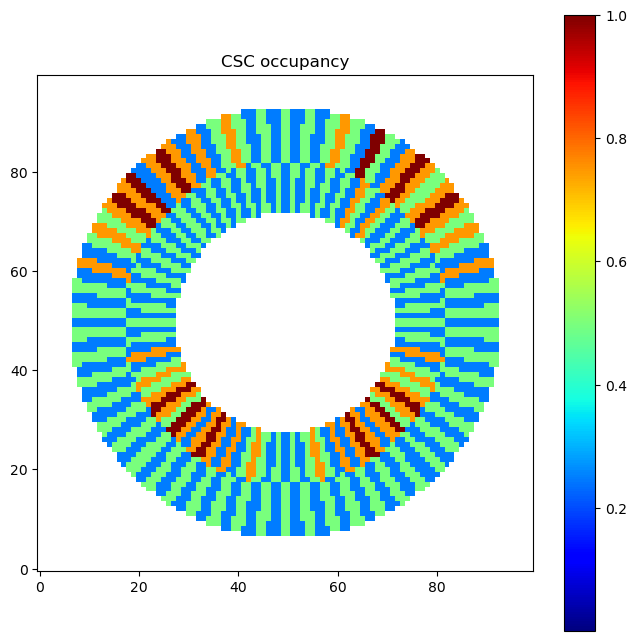

In [4]:
Show2Dimg(assign_colors(regions))

In [12]:
import numpy as np

def rebin(rebinning, image):
    """
        Example:
        arr1 = np.array([
            [0, 1, 2],
            [1, 2, 3],
            [3, 3, 0]
        ])

        arr2 = np.array([
            [1.3, 2., 4.],
            [2., 6., 8.],
            [7., 6., 3.0]
        ])

        arr3 = [
            [1.3 2.  5. ]
            [2.  5.  7. ]
            [7.  7.  3. ]
        ]
    """
    flat_binning = rebinning.flatten()
    flat_image = image.flatten()

    # Get unique values and inverse indices from flat_binning, excluding 0
    non_zero_indices = flat_binning != 0
    _, inverse_indices = np.unique(flat_binning[non_zero_indices], return_inverse=True)

    # Sum the values in image corresponding to each unique value in binning
    sum_vals = np.bincount(inverse_indices, weights=flat_image[non_zero_indices])

    # Count the occurrences of each unique value in binning
    count_vals = np.bincount(inverse_indices)

    # Calculate the mean for each unique value
    mean_vals = sum_vals / count_vals
 
    arr3 = np.copy(image)

    # Fill in the calculated mean values where arr1 is not zero
    arr3[rebinning != 0] = mean_vals[inverse_indices]

    return arr3

print(rebin(arr1, arr2))

[[1.3 2.  5. ]
 [2.  5.  7. ]
 [7.  7.  3. ]]
